# Predicting High-Traffic Recipes with Machine Learning

Models: Logistic Regression, Decision Tree, Random Forest
Business KPI: High Traffic Conversion Rate (HTCR ≥ 4.0)


# Business Goal

The goal of this analysis is to predict which recipes are likely to generate high website traffic, helping the content and marketing teams identify which recipes to feature on the homepage or promote through campaigns.

The business target is to build a predictive model that achieves:

- ≥ 80 % accuracy in identifying high-traffic recipes, and
- Provide interpretable insights into which features (nutrition and category) most influence popularity.

# Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have made the following changes after validation, remaining 895 rows and 8 columns. All the columns are just as described in the data dictionary:
- recipe: Unique identifier of recipe without missing values, same as the description. No cleaning is needed.
- calories: 52 missing values are dropped.
- carbohydrate: 52 missing values are dropped.
- sugar: 52 missing values are dropped.
- protein: 52 missing values are dropped.
- category: 11 categories without missing values. Category 'Chicken Breast' is replaced with 'Chicken' to match the description. 
- servings: No missing values but need to remove ' as a snack' wordings, keepings only integers, and change the data type from object to integer.
- high_traffic: Serves as target feature, with 574 missing observations. The missing rows will be imputed with 'Low'. The data is then converted to binary (1 for 'High', 0 for 'Low').

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
plt.style.use('ggplot')

In [204]:
df=pd.read_csv("recipe_site_traffic_2212.csv")

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [206]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [207]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [208]:
df['category']=df['category'].str.replace("Chicken Breast", "Chicken")
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [209]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [210]:
df['servings']=df['servings'].str.replace(" as a snack","")
df['servings']=df['servings'].astype(int)

In [211]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [212]:
df['high_traffic']=df['high_traffic'].fillna('Low')

In [213]:
df['high_traffic']=(df['high_traffic']=='High').astype(bool)

In [214]:
df['high_traffic'].unique()

array([ True, False])

In [215]:
df['high_traffic'].astype(int)

0      1
1      1
2      0
3      1
4      0
      ..
942    0
943    1
944    1
945    1
946    0
Name: high_traffic, Length: 947, dtype: int64

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    bool   
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 52.8+ KB


In [217]:
df.duplicated().sum()

0

In [218]:
df.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

No duplicated rows are found, but there are still 52 rows with missing values in all columns including calories, carbohydrate, sugar and proteins. These 52 rows are dropped.

In [219]:
df=df.dropna().reset_index(drop=True)

In [220]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,35.48,38.56,0.66,0.92,Potato,4,True
1,3,914.28,42.68,3.09,2.88,Breakfast,1,False
2,4,97.03,30.56,38.63,0.02,Beverages,4,True
3,5,27.05,1.85,0.80,0.53,Beverages,4,False
4,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  895 non-null    bool   
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 49.9+ KB


In [222]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


# Exploratory Analysis
I have investigated the target variable high_traffic and nutritional features of the recipe, and the relationship between them. After the analysis,I decided to apply the following changes to enable modeling:
- Use LabelEncoder on category feature
- Create nutritional variables per serving: calories_per_serving, carb_per_serving, protein_per_serving, sugar_per_serving, sweetness_density, protein_ratio and carb_protein_ratio
- Convert serving_size as category

### Target Feature - high_traffic

Since we need to predict the recipes labelled as high traffic, the high_traffic variable would be our target variable. From the barplot below, we can see there is a class imbalance.

<AxesSubplot: xlabel='high_traffic', ylabel='count'>

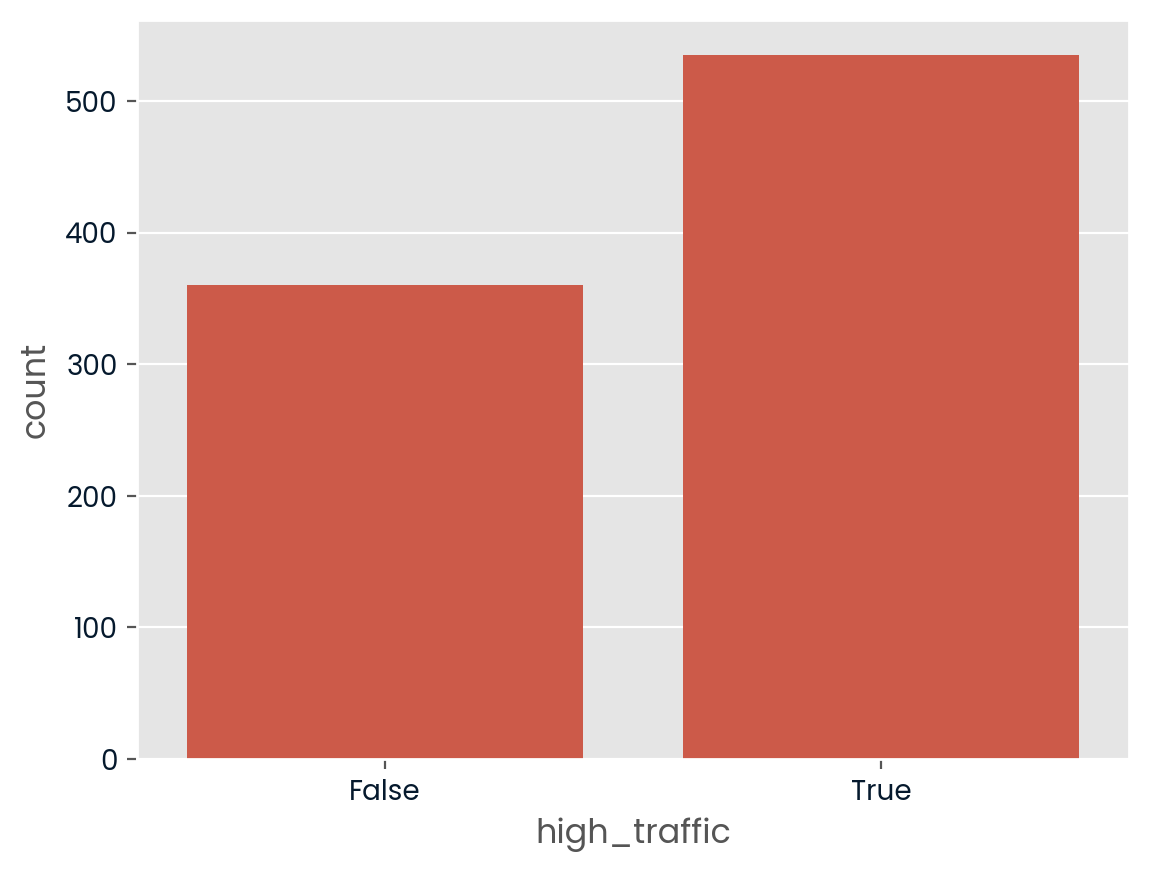

In [223]:
sns.countplot(data=df, x='high_traffic')

### Numerical Features - Calories, Carbohydrate, Protein & Sugar Per Serving

All numerical nutritional features exhibit right-skewed distributions, as shown in the histograms below. This suggests that these variables should be scaled or transformed before modeling to ensure better performance and interpretation.

To explore the relationship between nutritional values and recipe traffic popularity, all nutritional information has been standardized per serving, and the following new features have been created:

In [224]:
for cols in ['calories','carbohydrate','protein','sugar']:
    df[f"{cols} per serving"]=df[cols]/df['servings']

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   recipe                    895 non-null    int64  
 1   calories                  895 non-null    float64
 2   carbohydrate              895 non-null    float64
 3   sugar                     895 non-null    float64
 4   protein                   895 non-null    float64
 5   category                  895 non-null    object 
 6   servings                  895 non-null    int64  
 7   high_traffic              895 non-null    bool   
 8   calories per serving      895 non-null    float64
 9   carbohydrate per serving  895 non-null    float64
 10  protein per serving       895 non-null    float64
 11  sugar per serving         895 non-null    float64
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 77.9+ KB


[Text(0.5, 1.0, 'Distribution of Sugar per Serving')]

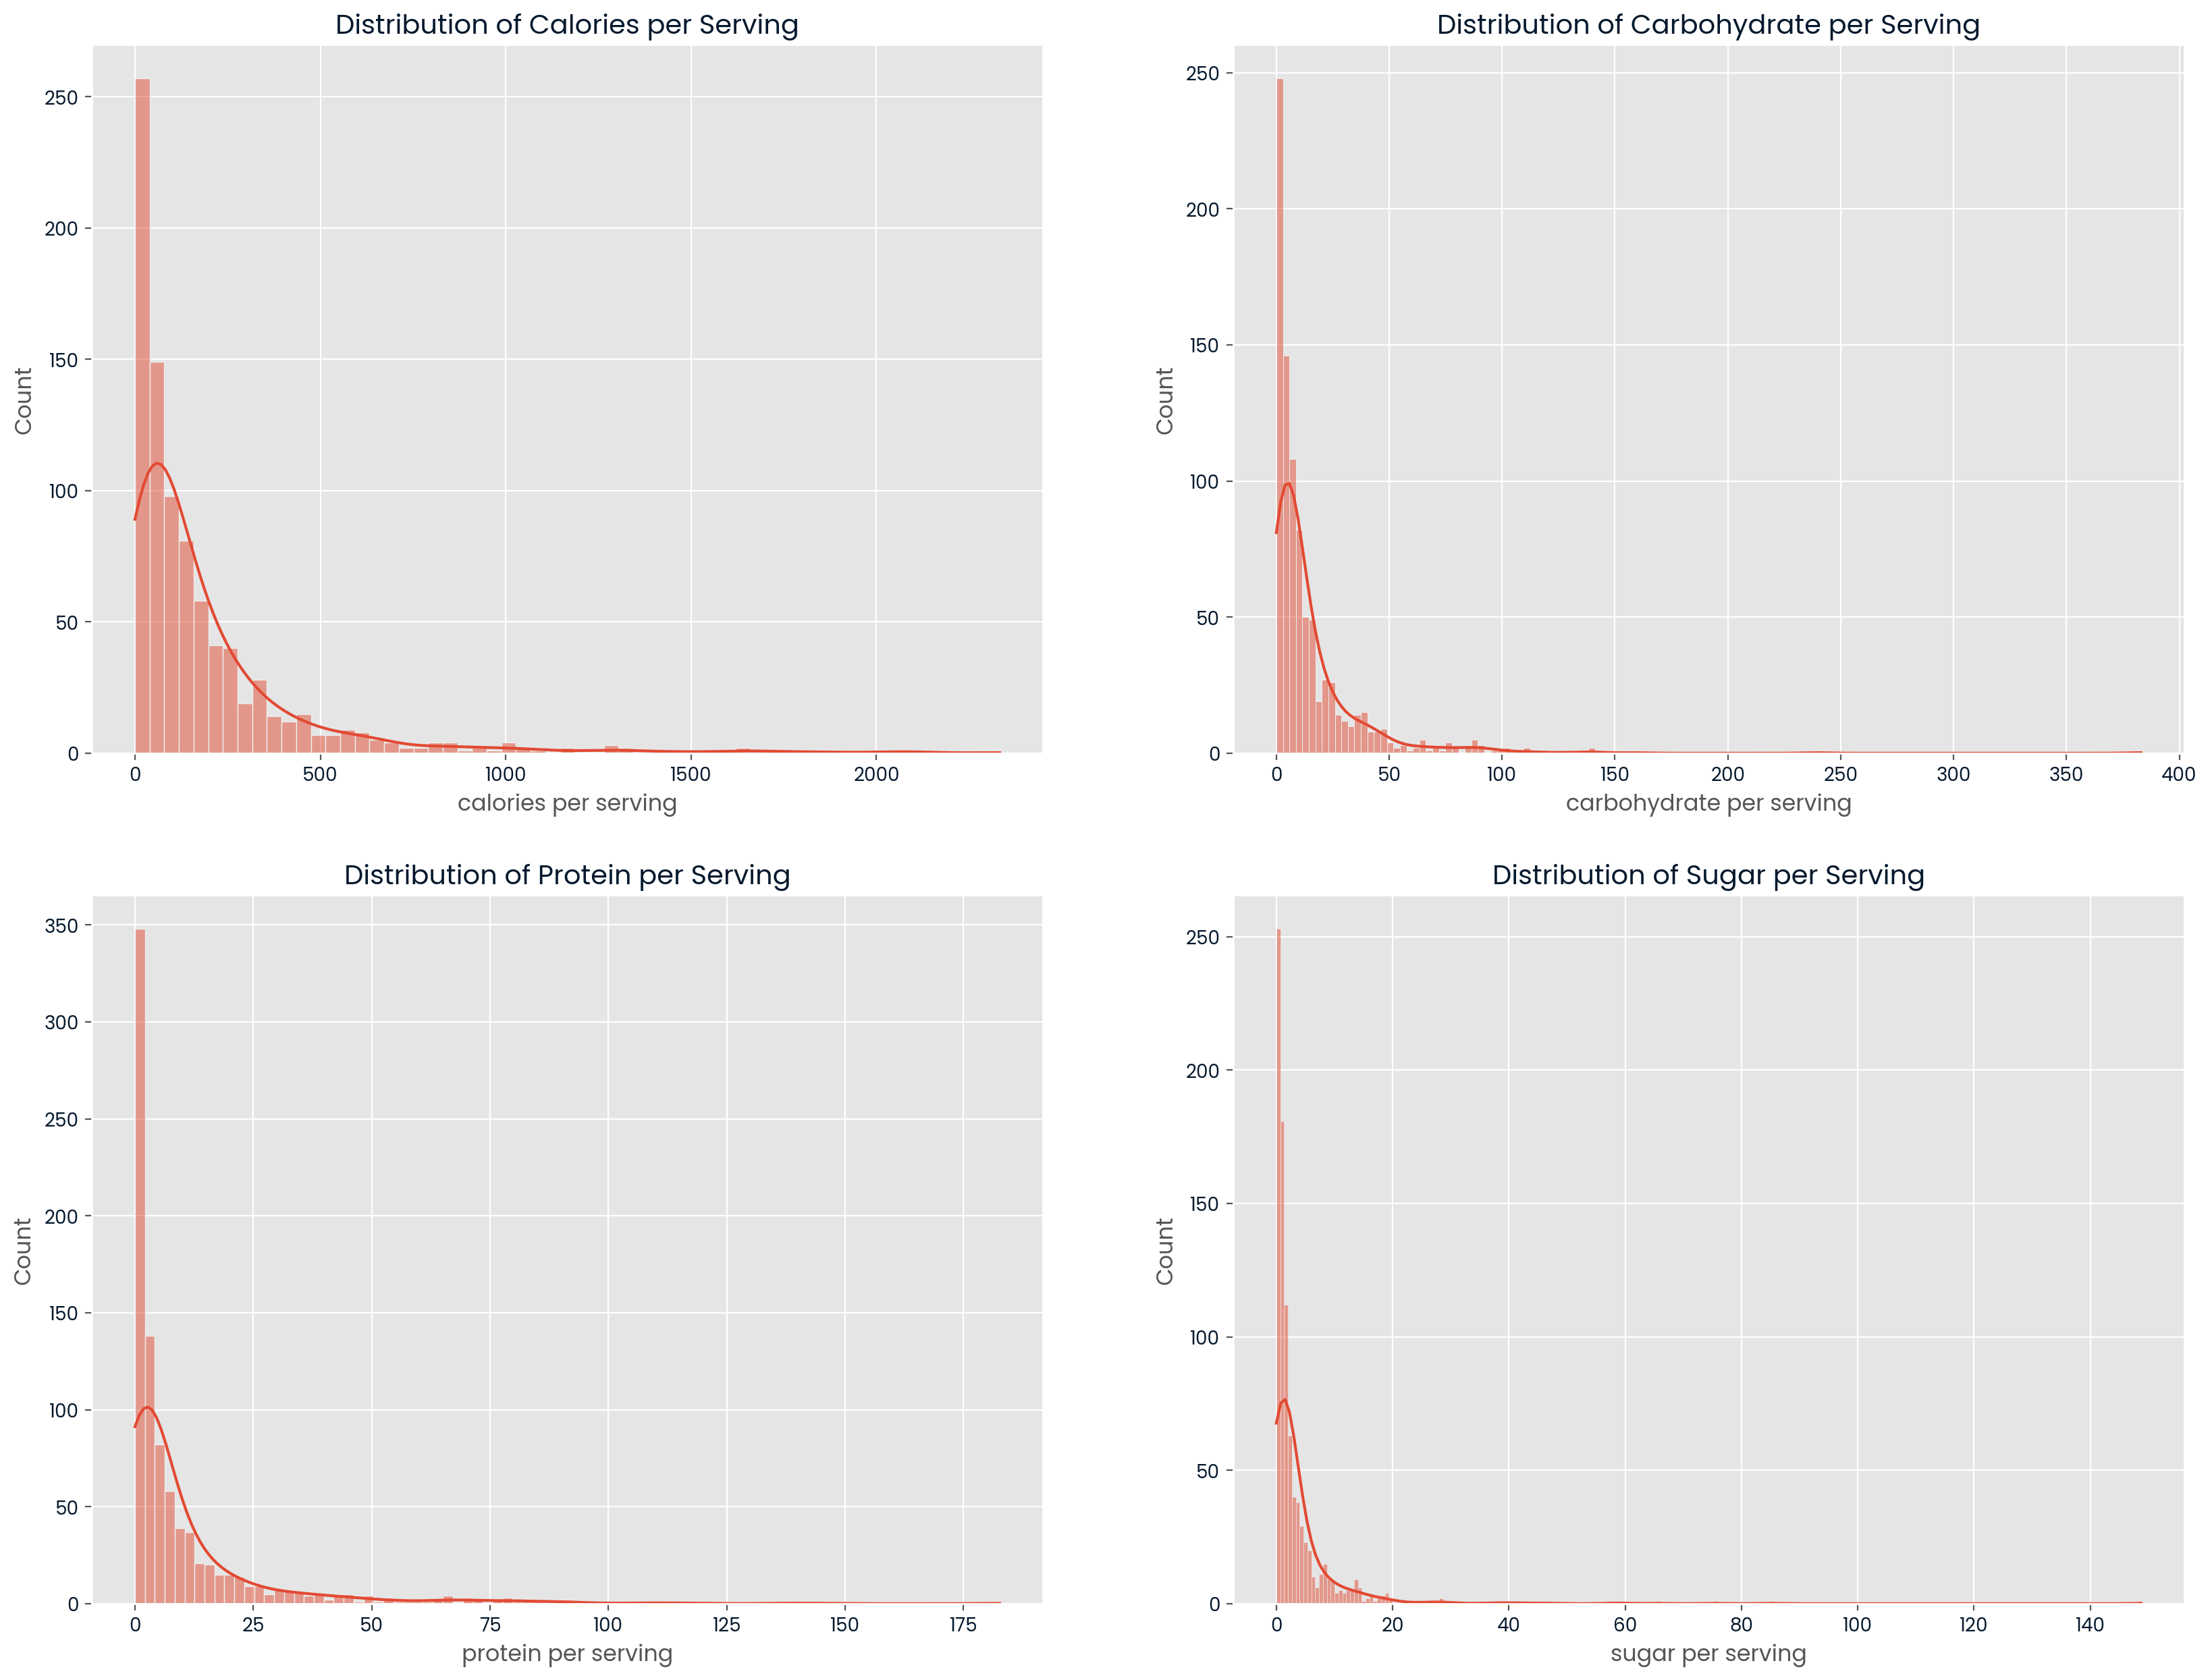

In [226]:
fig,axes=plt.subplots(2,2,figsize=(20,15))
sns.histplot(data=df, x='calories per serving', kde=True, ax=axes[0,0]).set(title='Distribution of Calories per Serving')
sns.histplot(data=df,x='carbohydrate per serving',kde=True,ax=axes[0,1]).set(title='Distribution of Carbohydrate per Serving')
sns.histplot(data=df,x='protein per serving',kde=True,ax=axes[1,0]).set(title='Distribution of Protein per Serving')
sns.histplot(data=df,x='sugar per serving',kde=True,ax=axes[1,1]).set(title='Distribution of Sugar per Serving')

### Serving Feature

Since the servings feature contains only four unique values (1, 2, 4, and 6), it is more appropriate to treat it as an ordinal categorical feature rather than a continuous numerical one. These values likely represent typical household sizes:

- 1: Single-person meals (individuals living alone)  
- 2: Meals for couples  
- 4: Meals for small families  
- 6: Meals for larger families  

This ordinal interpretation can help models better capture the underlying structure of the data.

In [227]:
df['servings']=df['servings'].astype('category')

[Text(0.5, 1.0, 'Distribution of Serving Sizes')]

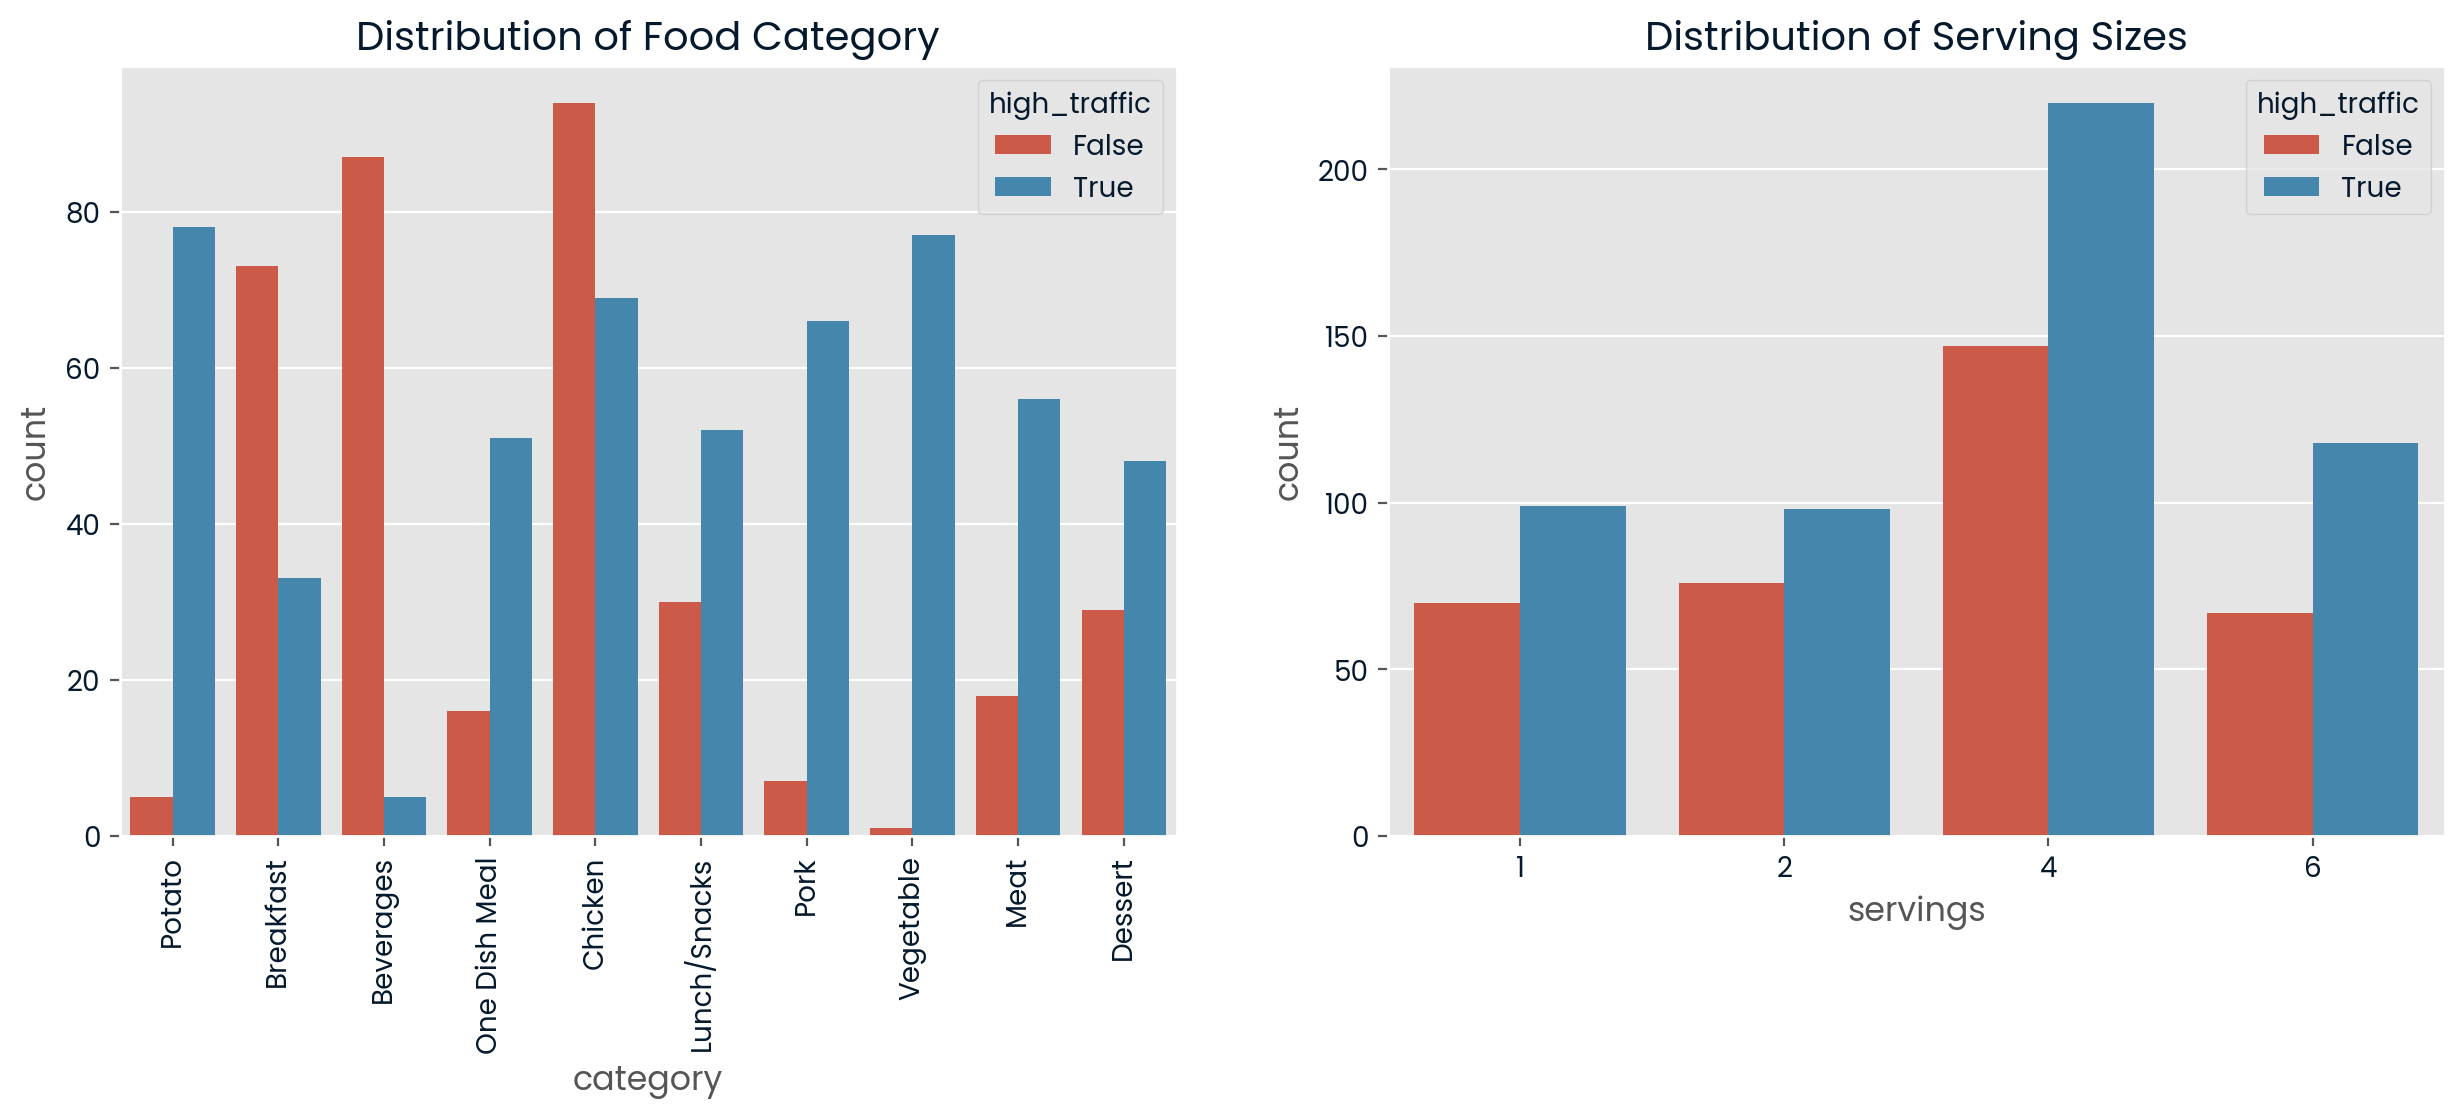

In [228]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df, x='category', hue='high_traffic', ax=axes[0]).set(title='Distribution of Food Category')
axes[0].tick_params(axis='x', rotation=90)
sns.countplot(data=df, x='servings',hue='high_traffic', ax=axes[1]).set(title='Distribution of Serving Sizes')

## Feature Engineering - sweetness_density, protein_ratio, carb_protein_ratio

To further explore the data, three new numerical features were engineered based on nutritional values per serving:

- Sweetness Density: Calculated as sugar per calorie, to examine whether high-sugar recipes are associated with higher traffic.  
- Protein Ratio: Calculated as protein per calorie, to investigate if high-protein recipes (e.g., gym-focused meals) tend to attract more traffic.  
- Carb-to-Protein Ratio: Calculated as carbohydrates divided by protein per serving, to explore whether users prefer recipes with higher carbohydrate-to-protein balance.

These derived features aim to reveal deeper patterns between nutrition content and recipe popularity.



In [229]:
df['sweetness_density'] = df['sugar per serving'] / df['calories per serving']
df['protein_ratio'] = df['protein per serving'] / df['calories per serving']
df['carb_protein_ratio'] = df['carbohydrate per serving'] / (df['protein per serving'] + 1)

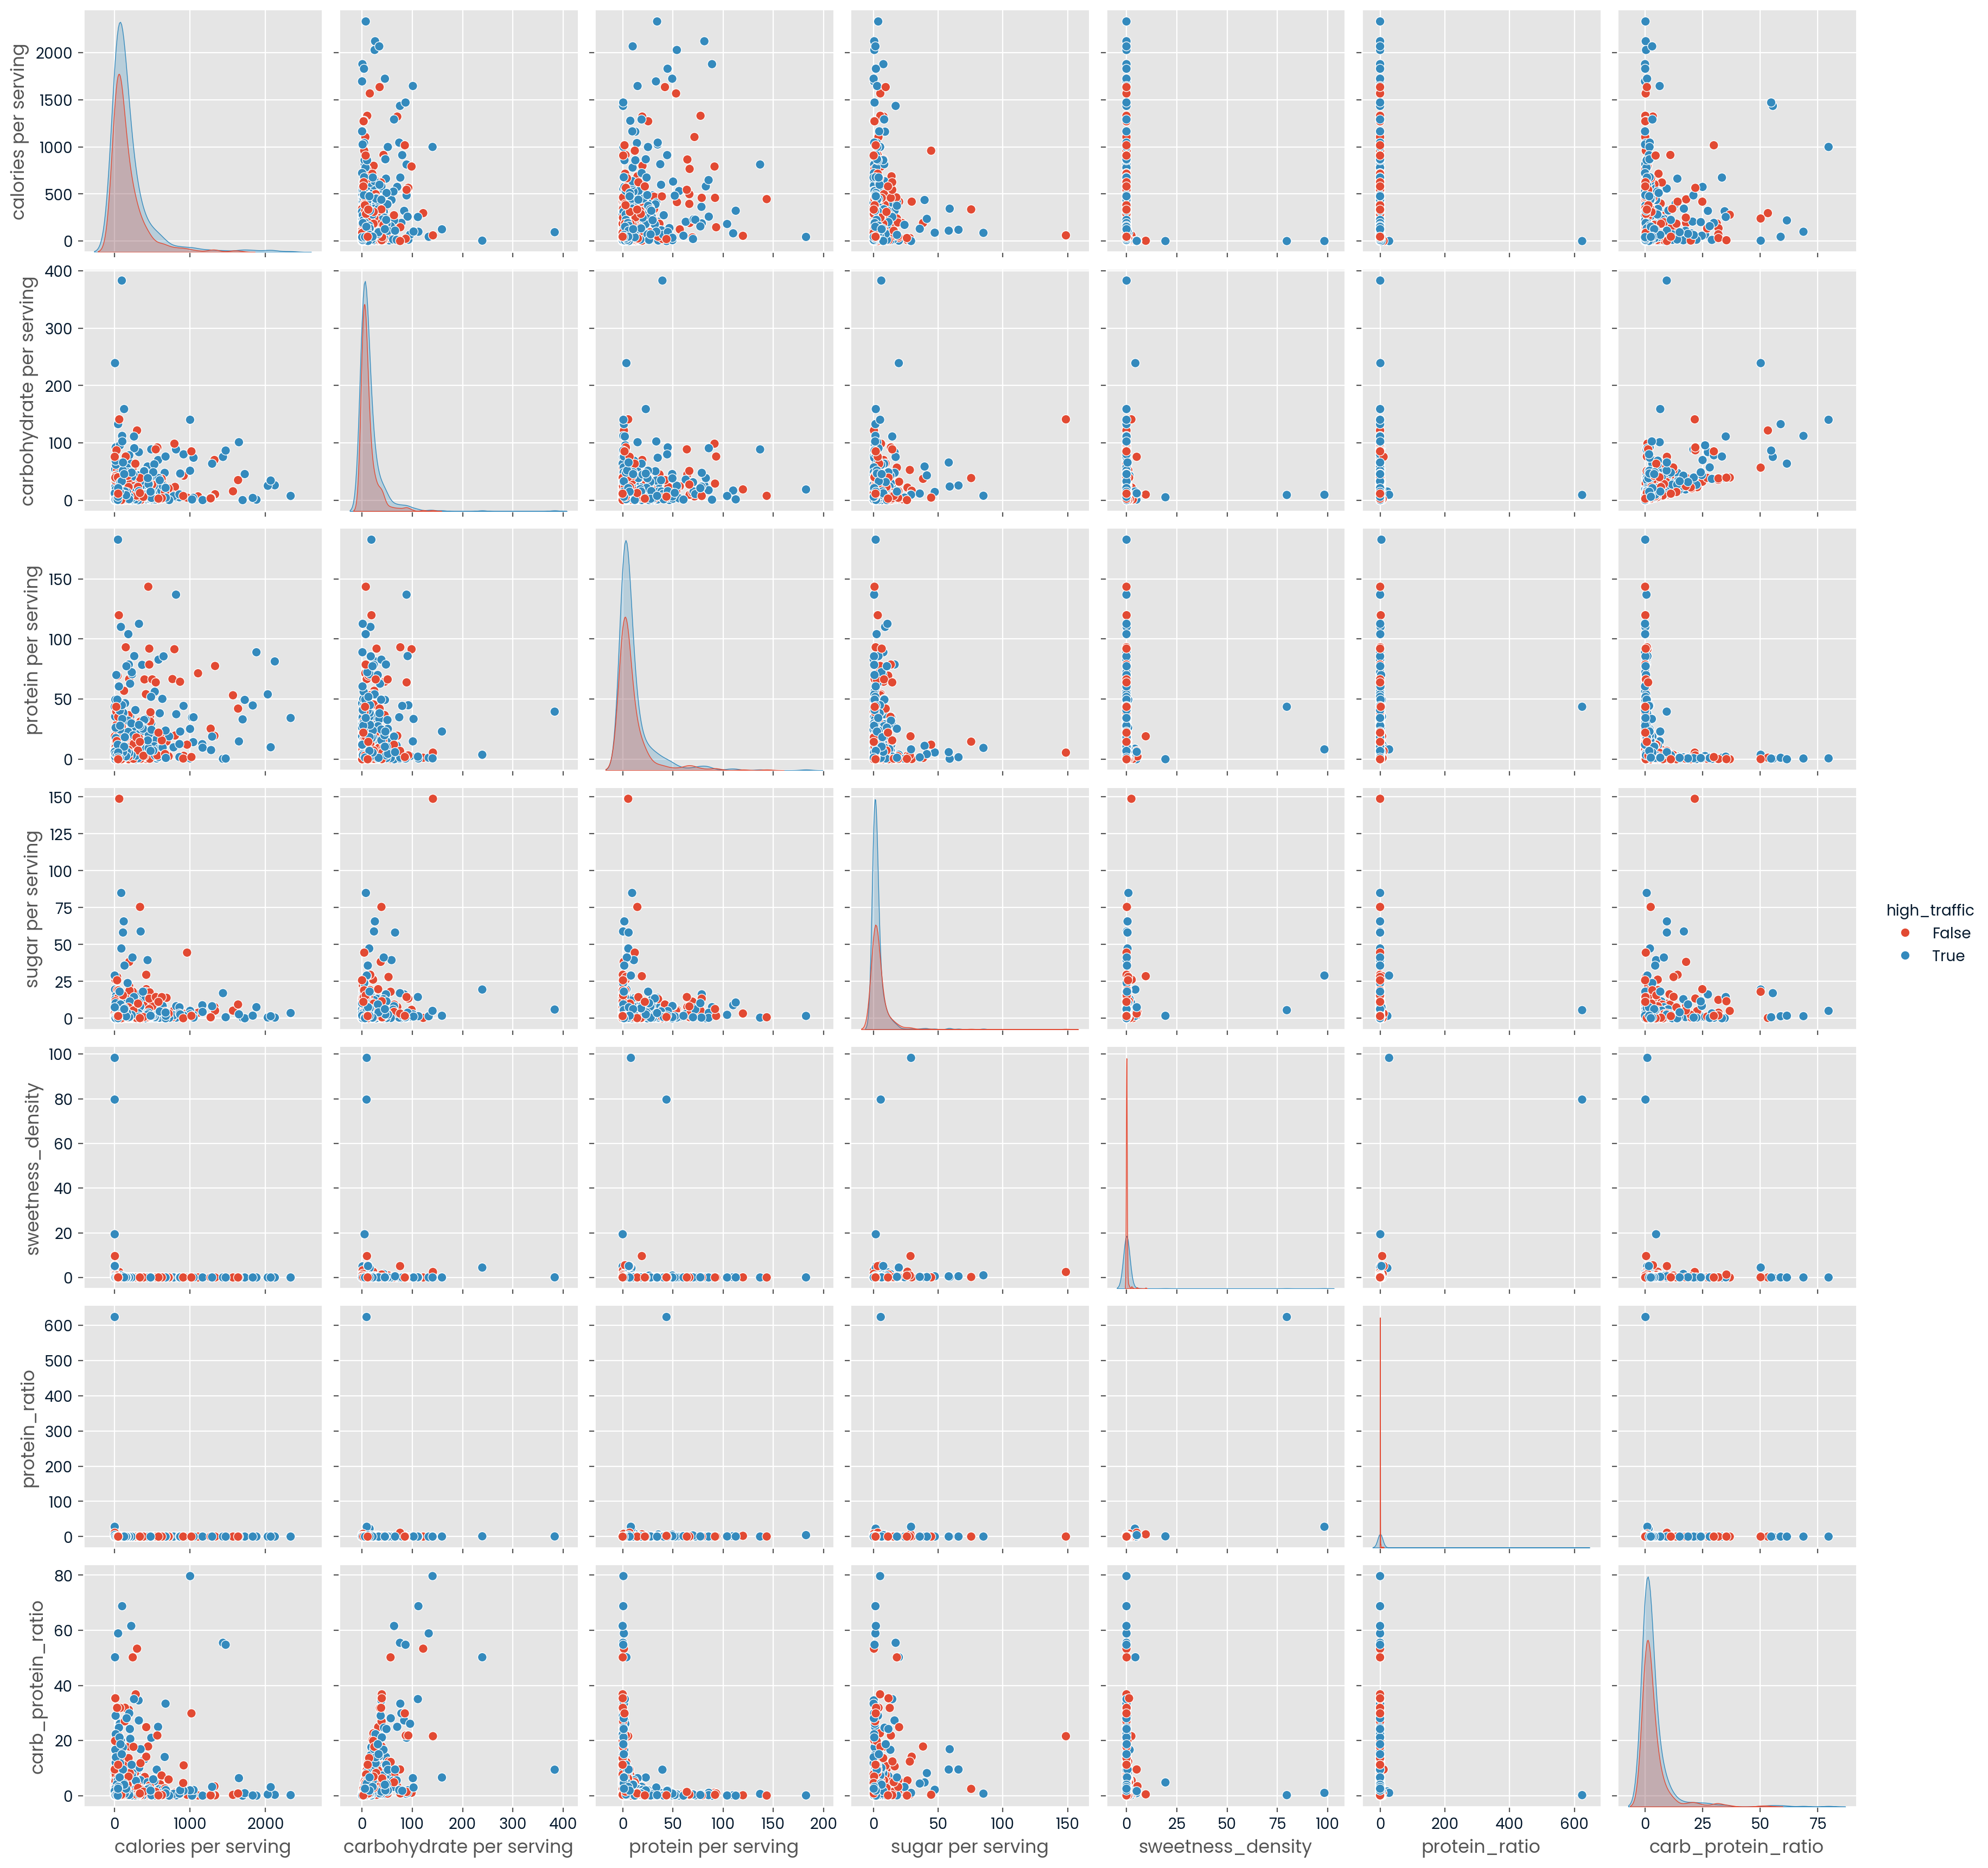

In [230]:
sns.pairplot(data=df,vars=['calories per serving','carbohydrate per serving', 'protein per serving','sugar per serving','sweetness_density','protein_ratio', 'carb_protein_ratio'], hue='high_traffic')

<AxesSubplot: >

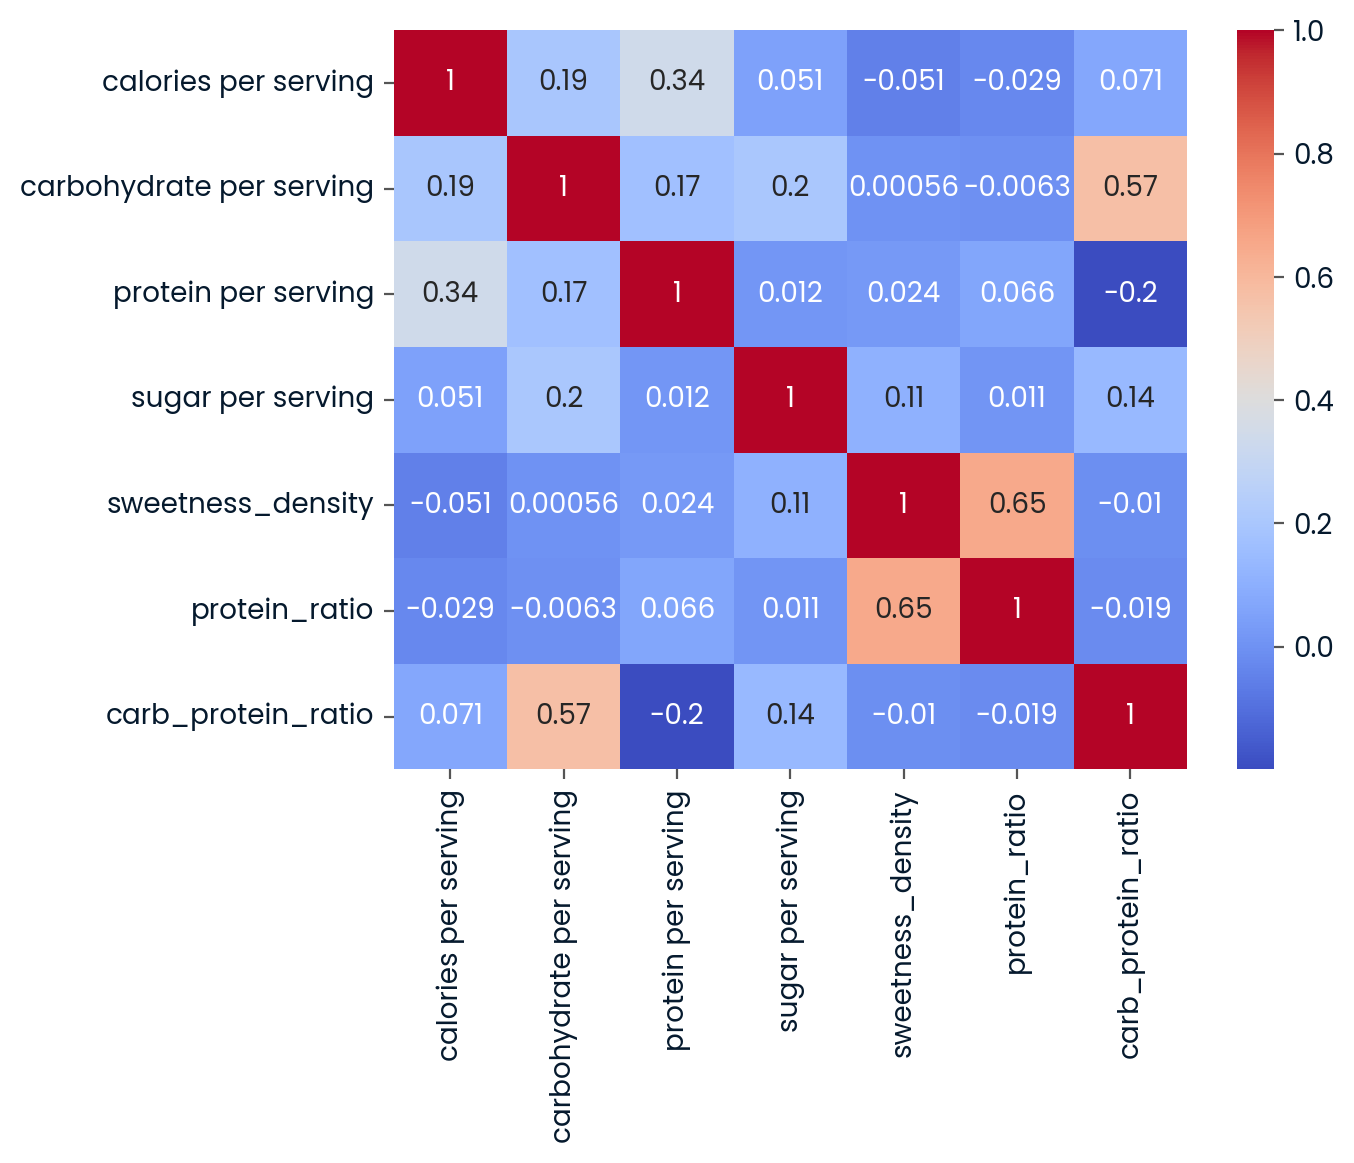

In [231]:
sns.heatmap(df[['calories per serving','carbohydrate per serving', 'protein per serving','sugar per serving','sweetness_density','protein_ratio', 'carb_protein_ratio']].corr(),annot=True, cmap='coolwarm')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   recipe                    895 non-null    int64   
 1   calories                  895 non-null    float64 
 2   carbohydrate              895 non-null    float64 
 3   sugar                     895 non-null    float64 
 4   protein                   895 non-null    float64 
 5   category                  895 non-null    object  
 6   servings                  895 non-null    category
 7   high_traffic              895 non-null    bool    
 8   calories per serving      895 non-null    float64 
 9   carbohydrate per serving  895 non-null    float64 
 10  protein per serving       895 non-null    float64 
 11  sugar per serving         895 non-null    float64 
 12  sweetness_density         895 non-null    float64 
 13  protein_ratio             895 non-null    float64 

In [233]:
df_encode=pd.get_dummies(df,columns=['category'],drop_first=True, prefix='cat')

In [234]:
df_encode.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,calories per serving,carbohydrate per serving,protein per serving,sugar per serving,sweetness_density,protein_ratio,carb_protein_ratio,cat_Breakfast,cat_Chicken,cat_Dessert,cat_Lunch/Snacks,cat_Meat,cat_One Dish Meal,cat_Pork,cat_Potato,cat_Vegetable
0,2,35.48,38.56,0.66,0.92,4,True,8.8700,9.6400,0.2300,0.1650,0.018602,0.025930,7.837398,0,0,0,0,0,0,0,1,0
1,3,914.28,42.68,3.09,2.88,1,False,914.2800,42.6800,2.8800,3.0900,0.003380,0.003150,11.000000,1,0,0,0,0,0,0,0,0
2,4,97.03,30.56,38.63,0.02,4,True,24.2575,7.6400,0.0050,9.6575,0.398124,0.000206,7.601990,0,0,0,0,0,0,0,0,0
3,5,27.05,1.85,0.80,0.53,4,False,6.7625,0.4625,0.1325,0.2000,0.029575,0.019593,0.408389,0,0,0,0,0,0,0,0,0
4,6,691.15,3.46,1.65,53.93,2,True,345.5750,1.7300,26.9650,0.8250,0.002387,0.078029,0.061863,0,0,0,0,0,1,0,0,0


In [235]:
for col in ['servings']:
    df_encode[col]=LabelEncoder().fit_transform(df_encode[col])

In [236]:
df_encode.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,calories per serving,carbohydrate per serving,protein per serving,sugar per serving,sweetness_density,protein_ratio,carb_protein_ratio,cat_Breakfast,cat_Chicken,cat_Dessert,cat_Lunch/Snacks,cat_Meat,cat_One Dish Meal,cat_Pork,cat_Potato,cat_Vegetable
0,2,35.48,38.56,0.66,0.92,2,True,8.8700,9.6400,0.2300,0.1650,0.018602,0.025930,7.837398,0,0,0,0,0,0,0,1,0
1,3,914.28,42.68,3.09,2.88,0,False,914.2800,42.6800,2.8800,3.0900,0.003380,0.003150,11.000000,1,0,0,0,0,0,0,0,0
2,4,97.03,30.56,38.63,0.02,2,True,24.2575,7.6400,0.0050,9.6575,0.398124,0.000206,7.601990,0,0,0,0,0,0,0,0,0
3,5,27.05,1.85,0.80,0.53,2,False,6.7625,0.4625,0.1325,0.2000,0.029575,0.019593,0.408389,0,0,0,0,0,0,0,0,0
4,6,691.15,3.46,1.65,53.93,1,True,345.5750,1.7300,26.9650,0.8250,0.002387,0.078029,0.061863,0,0,0,0,0,1,0,0,0


## Feature Selection
After careful consideration, the following columns were dropped prior to modeling:

- *recipe*: A unique identifier with no predictive value.  
- *calories, carbohydrate, sugar, protein, carbohydrate_per_serving, protein_per_serving, sugar_per_serving*: These features were removed due to high correlation with the engineered features — sweetness_density, protein_ratio, and carb_protein_ratio. Retaining only the derived features helps reduce redundancy and potential multicollinearity in the model.

In [237]:
df_model=df_encode.drop(['recipe','calories','carbohydrate','sugar','protein','carbohydrate per serving', 'protein per serving', 'sugar per serving'],axis=1)

### Single-variable insights

Nutritional features (calories, carbohydrate, sugar, protein) were all right-skewed — most recipes are low in calories and sugar, with few extreme values.

High-traffic ratio: ≈ 60 High : 40 Low.

### Multi-variable relationships

Correlation heatmap → weak correlations among nutrients; suggests complex nonlinear effects.

Category vs. High Traffic:
“Vegetable,” “Potato,” and “Pork” recipes show the highest proportion of high traffic, whereas “Beverages” and “Breakfast” show the lowest.

Servings vs. High Traffic: Recipes serving 4 people have the highest traffic likelihood.


# Data Modelling

Problem Type: Binary classification → predict high_traffic (1 = High, 0 = Low).

Features Used
Numerical: calories_per_serving, sweetness_density, protein_ratio, carb_protein_ratio
Categorical (encoded): category, servings

As the target variable is a binary classification, the following models were tested: Logistic Regression, Decision Tree, and Random Forest. These models were selected to compare both linear and tree-based approaches for predicting recipe traffic popularity.

In [238]:
X=df_model.drop(['high_traffic'], axis=1)
y=df_model['high_traffic']

In [239]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [240]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   servings              895 non-null    int64  
 1   high_traffic          895 non-null    bool   
 2   calories per serving  895 non-null    float64
 3   sweetness_density     895 non-null    float64
 4   protein_ratio         895 non-null    float64
 5   carb_protein_ratio    895 non-null    float64
 6   cat_Breakfast         895 non-null    uint8  
 7   cat_Chicken           895 non-null    uint8  
 8   cat_Dessert           895 non-null    uint8  
 9   cat_Lunch/Snacks      895 non-null    uint8  
 10  cat_Meat              895 non-null    uint8  
 11  cat_One Dish Meal     895 non-null    uint8  
 12  cat_Pork              895 non-null    uint8  
 13  cat_Potato            895 non-null    uint8  
 14  cat_Vegetable         895 non-null    uint8  
dtypes: bool(1), float64(4),

As the numerical features exhibit right-skewed distributions, they were transformed and normalized using PowerTransformer to reduce skewness and better prepare the data for modeling. This ensures that the features are more normally distributed, which can improve model performance and stability.

In [241]:
pt=PowerTransformer()

In [242]:
num_cols = ['calories per serving', 'sweetness_density', 'protein_ratio', 'carb_protein_ratio']

In [243]:
X_train[num_cols]=pt.fit_transform(X_train[num_cols])

In [244]:
X_test[num_cols]=pt.transform(X_test[num_cols])

### Logistic Regression

Logistic Regression achieved high precision (88%) but lower recall (53%), meaning it correctly identifies high-traffic recipes most of the time but misses some. Its HTCR = 7.13 indicates that for every false positive, there are over seven correct high-traffic predictions — excellent reliability for business use.

In [245]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [246]:
lr_y_pred=lr.predict(X_test)

In [247]:
print("LogisticRegression Accuracy: ", accuracy_score(y_test, lr_y_pred))
print("LogisticRegression Precision: ", precision_score(y_test, lr_y_pred))
print("LogisticRegression F1 score: ", f1_score(y_test, lr_y_pred))
print("LogisticRegression Recall: ", recall_score(y_test, lr_y_pred))

LogisticRegression Accuracy:  0.6759776536312849
LogisticRegression Precision:  0.8769230769230769
LogisticRegression F1 score:  0.6627906976744186
LogisticRegression Recall:  0.5327102803738317


In [248]:
print("LogisticRegression Confusion Matrix: ", confusion_matrix(y_test, lr_y_pred))

LogisticRegression Confusion Matrix:  [[64  8]
 [50 57]]


### Decision Tree
The Decision Tree improved overall balance, with both accuracy (73%) and recall (74%) higher than Logistic Regression. However, its HTCR of 3.76 falls below the KPI target of 4.0, indicating slightly more false positives. The model captures complex relationships well but is somewhat overfitted.

In [249]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [250]:
tr_y_pred=tree.predict(X_test)

In [251]:
print("DecisionTree Accuracy: ", accuracy_score(y_test, tr_y_pred))
print("DecisionTree Precision: ", precision_score(y_test, tr_y_pred))
print("DecisionTree F1 score: ", f1_score(y_test, tr_y_pred))
print("DecisionTree Recall: ", recall_score(y_test, tr_y_pred))
print("DecisionTree Confusion Matrix: ", confusion_matrix(y_test, tr_y_pred))

DecisionTree Accuracy:  0.7262569832402235
DecisionTree Precision:  0.79
DecisionTree F1 score:  0.7632850241545893
DecisionTree Recall:  0.7383177570093458
DecisionTree Confusion Matrix:  [[51 21]
 [28 79]]


### Random Forest
The Random Forest’s accuracy and recall are similar to the Decision Tree, but its HTCR = 3.13 shows weaker reliability in identifying truly popular recipes. It generalizes better than the Decision Tree but still doesn’t surpass the precision and stability of Logistic Regression.

In [252]:
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [253]:
rf_y_pred=rf.predict(X_test)

In [254]:
print("RandomForest Accuracy: ", accuracy_score(y_test, rf_y_pred))
print("RandomForest Precision: ", precision_score(y_test, rf_y_pred))
print("RandomForest F1 score: ", f1_score(y_test, rf_y_pred))
print("RandomForest Recall: ", recall_score(y_test, rf_y_pred))
print("RandomForest Confusion Matrix: ", confusion_matrix(y_test, rf_y_pred))

RandomForest Accuracy:  0.6871508379888268
RandomForest Precision:  0.7575757575757576
RandomForest F1 score:  0.7281553398058253
RandomForest Recall:  0.7009345794392523
RandomForest Confusion Matrix:  [[48 24]
 [32 75]]


## Model Interpretability and Feature Importance

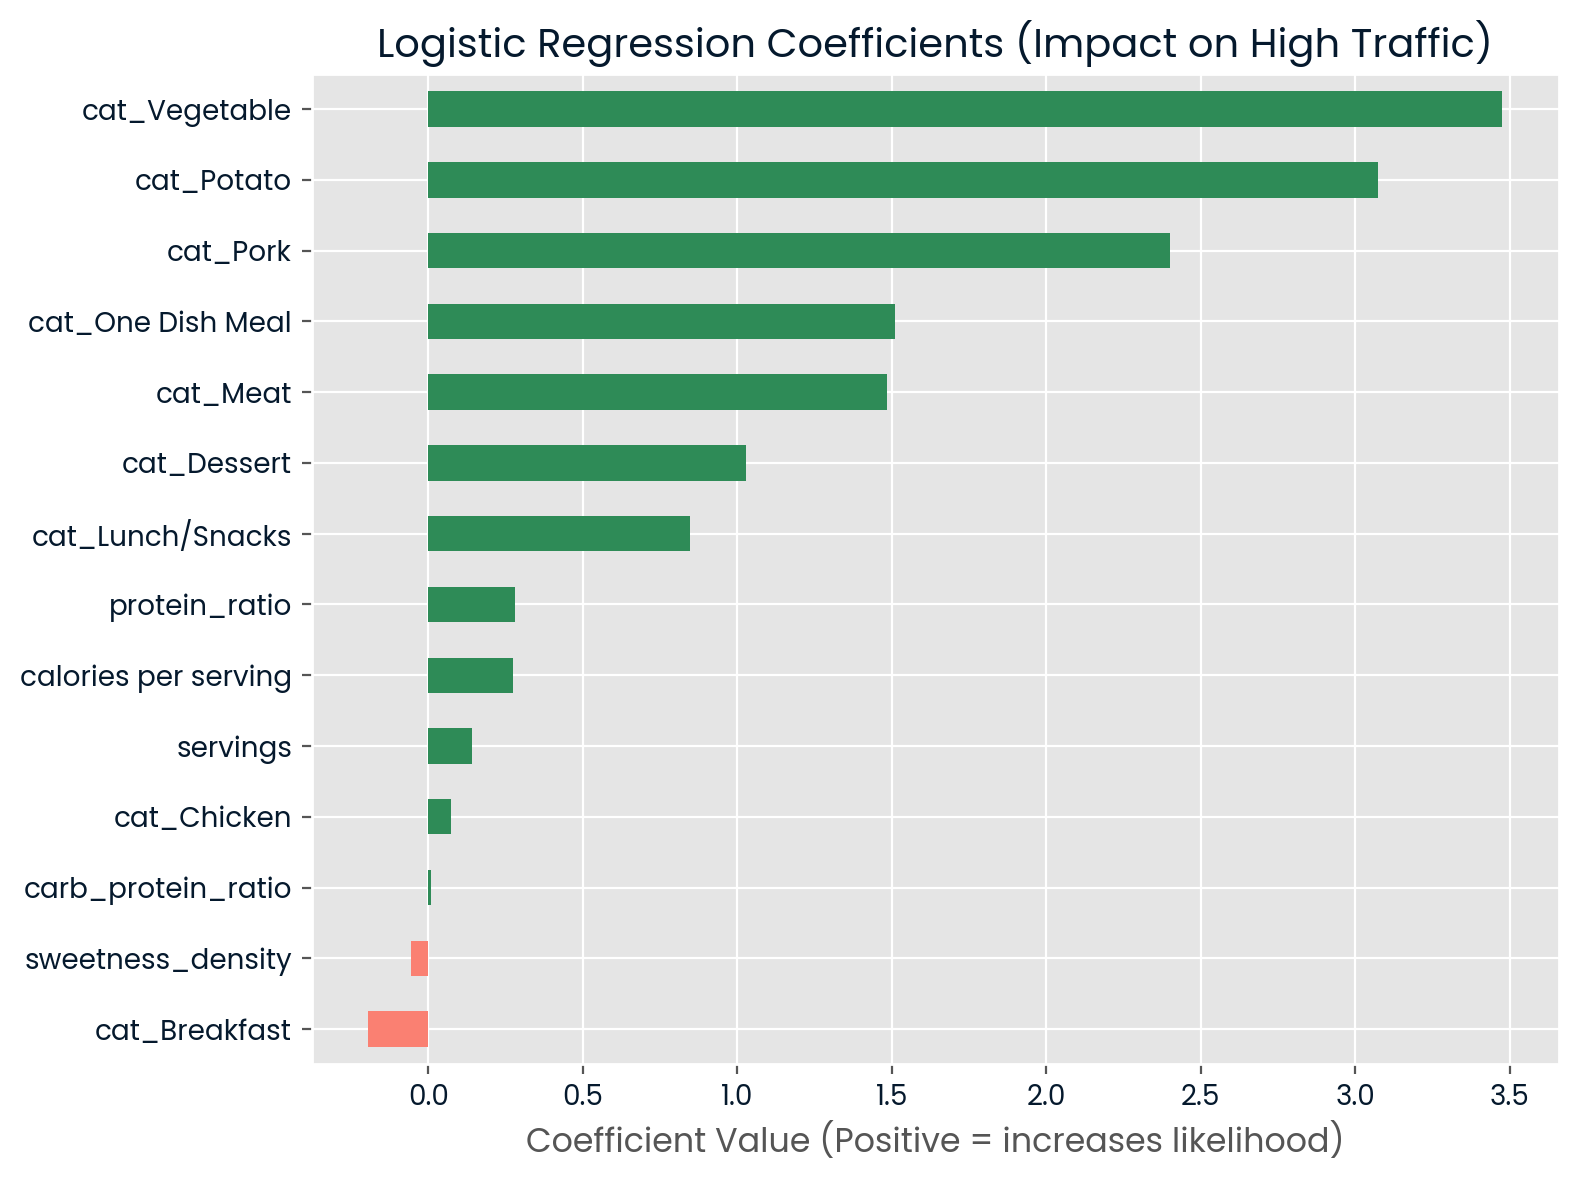


=== Top Logistic Regression Coefficients ===
cat_Vegetable           3.475010
cat_Potato              3.072345
cat_Pork                2.400290
cat_One Dish Meal       1.509932
cat_Meat                1.484864
cat_Dessert             1.028252
cat_Lunch/Snacks        0.847080
protein_ratio           0.281150
calories per serving    0.275092
servings                0.142802
dtype: float64

=== Bottom (Negative) Coefficients ===
cat_Breakfast          -0.194614
sweetness_density      -0.055458
carb_protein_ratio      0.009270
cat_Chicken             0.072914
servings                0.142802
calories per serving    0.275092
protein_ratio           0.281150
cat_Lunch/Snacks        0.847080
cat_Dessert             1.028252
cat_Meat                1.484864
dtype: float64


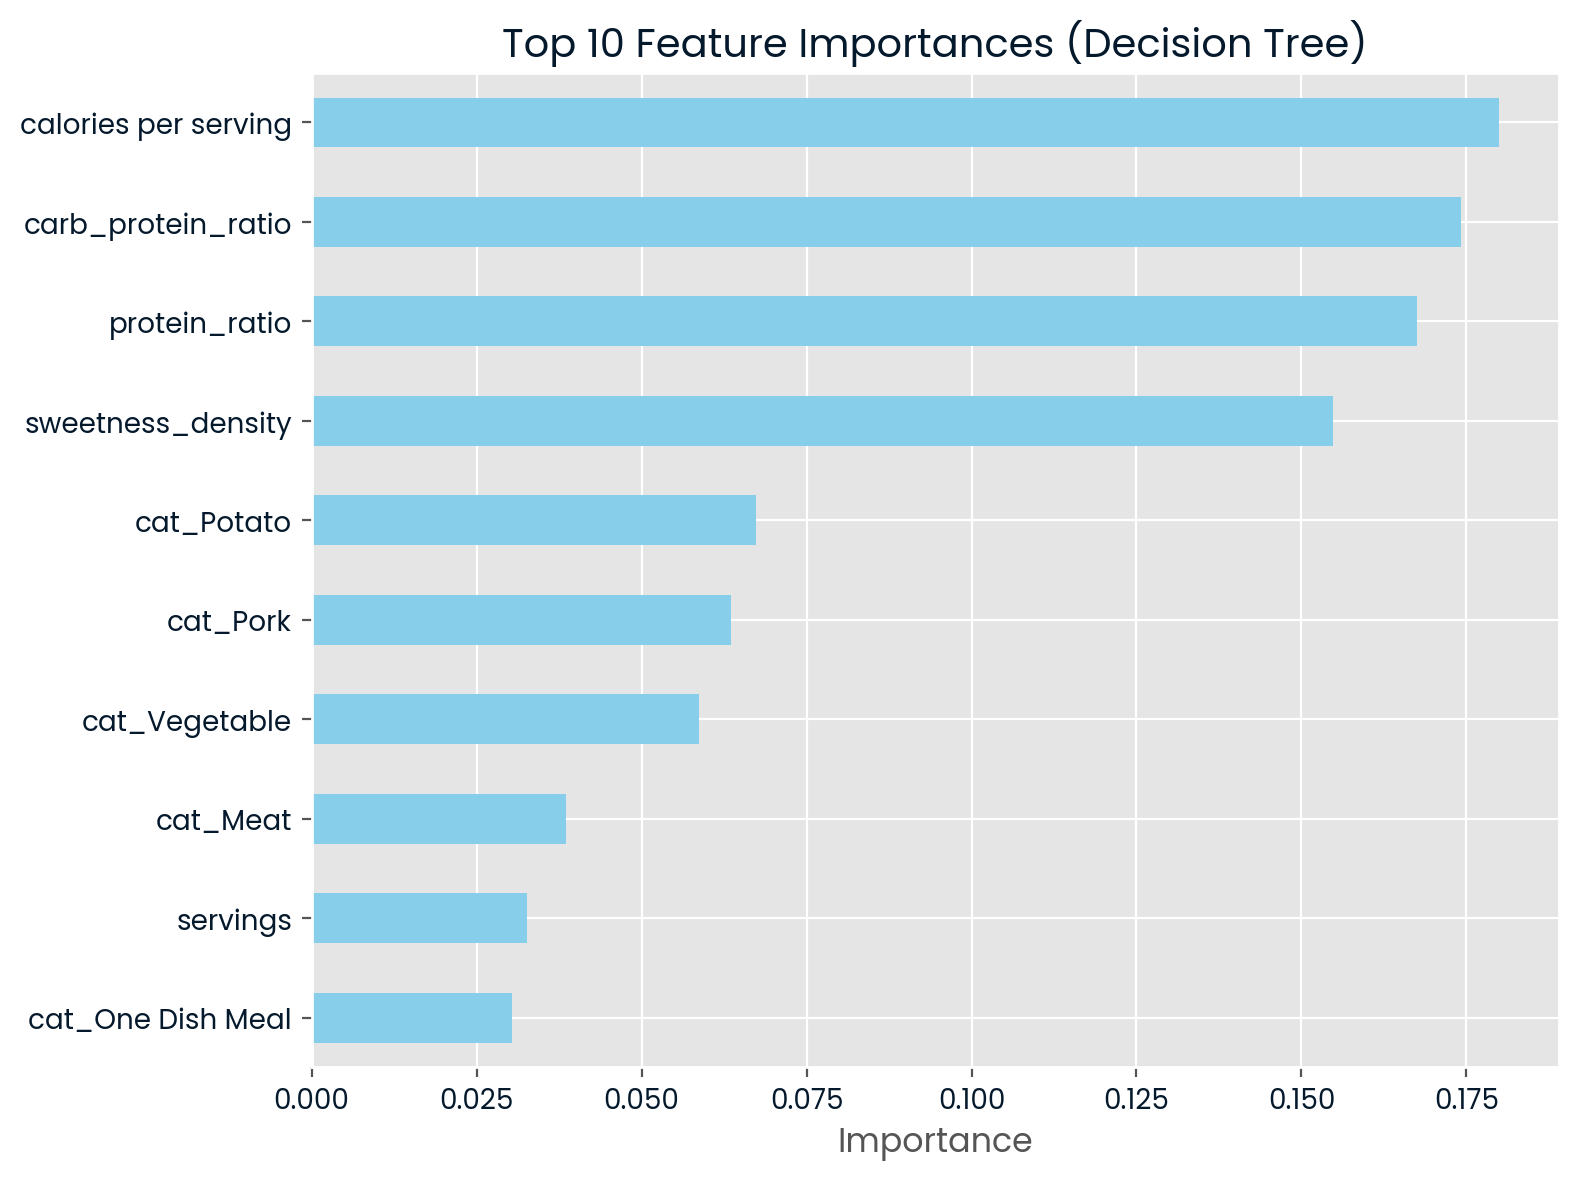


=== Top 10 Decision Tree Feature Importances ===
calories per serving    0.179967
carb_protein_ratio      0.174228
protein_ratio           0.167474
sweetness_density       0.154779
cat_Potato              0.067332
cat_Pork                0.063485
cat_Vegetable           0.058778
cat_Meat                0.038530
servings                0.032601
cat_One Dish Meal       0.030313
dtype: float64


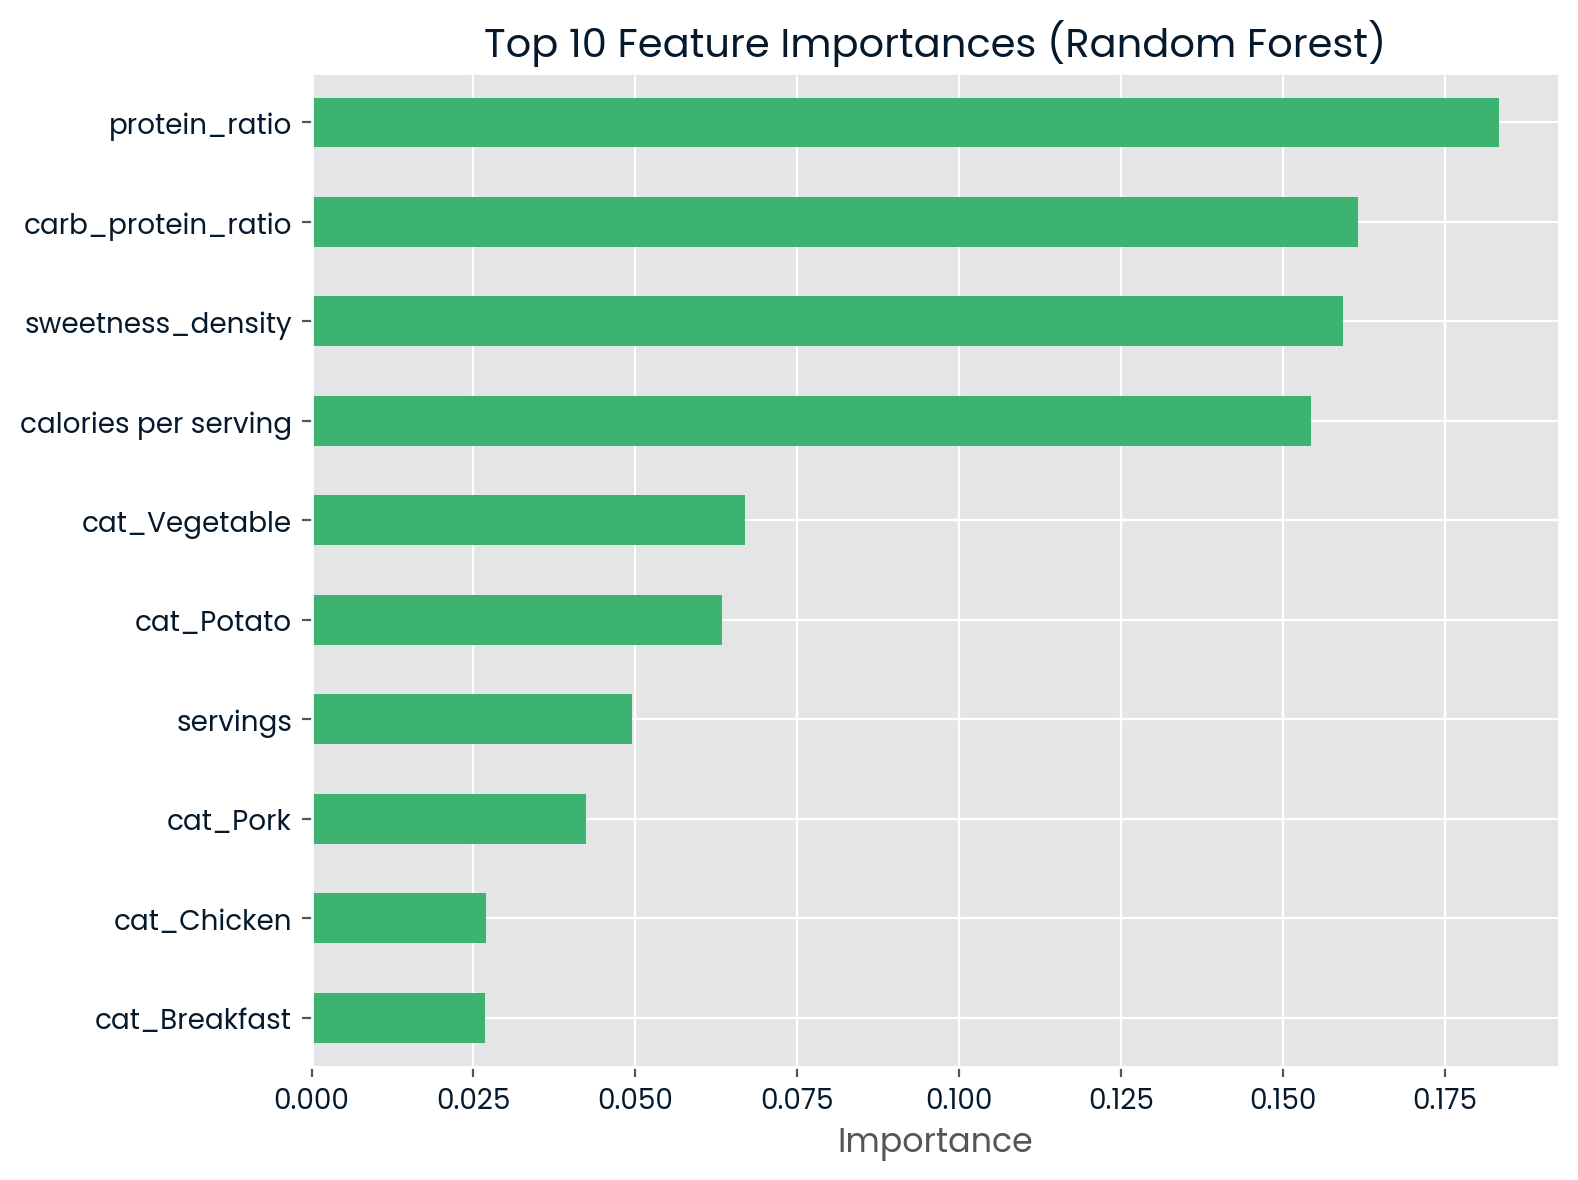


=== Top 10 Random Forest Feature Importances ===
protein_ratio           0.183443
carb_protein_ratio      0.161587
sweetness_density       0.159305
calories per serving    0.154441
cat_Vegetable           0.067018
cat_Potato              0.063431
servings                0.049537
cat_Pork                0.042366
cat_Chicken             0.026925
cat_Breakfast           0.026733
dtype: float64


In [255]:
# =========================================
# Logistic Regression Feature Importance
# =========================================

coef = pd.Series(lr.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(8,6))
coef.plot(kind='barh', color=np.where(coef > 0, 'seagreen', 'salmon'))
plt.title("Logistic Regression Coefficients (Impact on High Traffic)")
plt.xlabel("Coefficient Value (Positive = increases likelihood)")
plt.tight_layout()
plt.show()

print("\n=== Top Logistic Regression Coefficients ===")
print(coef.sort_values(ascending=False).head(10))
print("\n=== Bottom (Negative) Coefficients ===")
print(coef.sort_values(ascending=True).head(10))

# =========================================
# Decision Tree Feature Importance
# =========================================
dt_importance = pd.Series(tree.feature_importances_, index=X.columns)
dt_sorted = dt_importance.sort_values(ascending=False)

plt.figure(figsize=(8,6))
dt_sorted.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== Top 10 Decision Tree Feature Importances ===")
print(dt_sorted.head(10))

# =========================================
# Random Forest Feature Importance
# =========================================
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_sorted = rf_importance.sort_values(ascending=False)

plt.figure(figsize=(8,6))
rf_sorted.head(10).plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== Top 10 Random Forest Feature Importances ===")
print(rf_sorted.head(10))

## Logistic Regression Coefficients

The top positive coefficients highlight which features increase the probability of high traffic:

- cat_Vegetable (3.48) – vegetable recipes are the strongest predictors of high traffic.
- cat_Potato (3.07) and cat_Pork (2.40) – both show strong user interest.
- cat_One Dish Meal (1.51), cat_Meat (1.48), and cat_Dessert (1.03) also contribute positively.

Among continuous variables, protein_ratio (0.28) and calories per serving (0.28) show moderate positive influence.

Negative coefficients indicate factors that decrease traffic likelihood:
- cat_Breakfast (-0.19) – breakfast recipes are less engaging.
- sweetness_density (-0.06) – overly sweet dishes tend to reduce popularity.

Overall, high-traffic recipes are savory, protein-rich, and meal-oriented rather than light or sweet.

## Decision Tree Importance

The Decision Tree emphasized:

- calories per serving (0.18), carb_protein_ratio (0.17), and protein_ratio (0.17) as top drivers.
- sweetness_density (0.15) followed by category variables (Potato, Pork, Vegetable) and servings size.

This indicates that nutritional balance and food type are key determinants of recipe engagement.

## Random Forest Importance
The Random Forest showed consistent results:

- protein_ratio (0.183), carb_protein_ratio (0.162), sweetness_density (0.159), and calories per serving (0.154) were most impactful.
- cat_Vegetable (0.067) and cat_Potato (0.063) reaffirm category importance.
- Minor predictors include servings, cat_Pork, cat_Chicken, and cat_Breakfast.

These repeated patterns across all models strengthen confidence in the interpretation.

## Business KPI: High-Traffic Conversion Rate (HTCR)

To evaluate practical impact, High-Traffic Conversion Rate (HTCR) was calculated as the ratio of true positives to false positives.
This metric measures how many correctly identified high-traffic recipes exist for every incorrectly flagged one.

In [257]:
cf_lr=confusion_matrix(y_test, lr_y_pred)
tn, fp, fn, tp = cf_lr.ravel()
htcr_lr= tp/fp
print("HTCR of Logistic Regression: ", htcr_lr)

cf_tree=confusion_matrix(y_test, tr_y_pred)
tn, fp, fn, tp = cf_tree.ravel()
htcr_tree= tp/fp
print("HTCR of Decision Tree: ", htcr_tree)

cf_rf=confusion_matrix(y_test, rf_y_pred)
tn, fp, fn, tp = cf_rf.ravel()
htcr_rf= tp/fp
print("HTCR of Random Forest: ", htcr_rf)

HTCR of Logistic Regression:  7.125
HTCR of Decision Tree:  3.761904761904762
HTCR of Random Forest:  3.125


A target KPI of 4.0 was established, meaning that for every one false positive, the model should correctly identify at least four true high-traffic recipes. This target directly corresponds to a precision of 80%, since precision can be expressed as:

- Logistic Regression: HTCR = 7.13
- Decision Tree: HTCR = 3.76
- Random Forest: HTCR = 3.13

Only the Logistic Regression model exceeded the KPI threshold of 4.0, proving its reliability for business application.
It delivers high-confidence “high-traffic” predictions, minimizing false promotions of unpopular recipes.

The Logistic Regression model best fulfills the business objective — offering interpretable insights and strong predictive reliability, even if overall accuracy remains below 80%. It provides a solid foundation for data-driven content optimization.

## Key Findings

- Vegetable, Potato, and Pork recipes consistently drive high engagement. These categories dominate in all models, confirming their popularity.
- High-traffic recipes are balanced in calories and protein. They are neither extremely low-calorie nor overly sweet — appealing to general meal preferences.
- Servings between 4–6 perform better than smaller ones, likely due to their family or group appeal.
- Precision is more valuable than recall for this business case — it’s better to confidently recommend a smaller set of truly popular recipes than flood the homepage with uncertain ones.

## Conclusion and Recommendations

Among the three models, Logistic Regression is the best performing for business use:
- Highest precision (0.877) and HTCR (7.13)
- Simple, interpretable coefficients for management insight
- Reliable, low false-positive rate
- While its recall is lower, this trade-off is acceptable since the business prioritizes accuracy of high-traffic predictions over quantity.

## Recommendations:

1. Deploy Logistic Regression as the baseline production model.
2. Enhance the dataset by adding user behavior features (e.g., page views, dwell time, or recipe rating).
3. Experiment with advanced models (e.g., XGBoost, tuned Random Forest) once more data is available.
4. Regularly retrain and recalibrate the model as new recipes and trends evolve.